## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-05-29 18:22:52.826409: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 18:22:54.505196: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-29 18:22:56.645268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  import numpy.matlib as npm

  au

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn
absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn


<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 1.6%
RAM Usage: 2.9%
Available RAM: 977.3G
Total RAM: 1007.0G
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 1
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

**Model Parameter Count**
- PCA Bilinear : 730 (27 PCs)
- PLS Bilinear : 101 (10 PLS components)
- Bilinear Lowrank : 73,800 (rank 10)
- PLS MLP : 158,993 (10 PLS components, including PLS projection matrices)
- PCA MLP : 47,873 (27 PCs)
(2 layer)
- MLP : 3,812,609
- SMT : 1,399,947
- MLP w/ CLS : 3,814,145
- SMT w/ CLS : 1,405,579
(3 layer)
- MLP : 7,723,777
- SMT : 2,162,315
- MLP w/ CLS : 7,726,849
- SMT w/ CLS : 2,173,067

**Coord MLP Parameter Count** 
- [32]: 321
- [64, 32]: 2,753
- [128, 64]: 9,601
- [256, 128]: 35,685
- [512, 256, 128]: 169,729

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
feature_name:  euclidean
processing_type:  None
features ['transcriptome', 'euclidean']
X generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: h30d1e26
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/h30d1e26
Initialized sweep with ID: h30d1e26


  warnings.warn(



2
3
4
BEST CONFIG {'input_dim': 14766, 'binarize': False, 'hidden_dims': [512, 256, 128], 'learning_rate': 9e-05, 'batch_size': 512, 'dropout_rate': 0.2, 'weight_decay': 0.0001, 'epochs': 125}
Number of learnable parameters in MLP: 7726849
Using device: cuda
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.04 GB
Best val loss so far at epoch 1: 0.0292
Best val loss so far at epoch 2: 0.0252
Best val loss so far at epoch 3: 0.0240
Best val loss so far at epoch 4: 0.0215
Best val loss so far at epoch 5: 0.0200
Epoch 5/125, Train Loss: 0.0352, Val Loss: 0.0200, Time: 3.69s
Best val loss so far at epoch 6: 0.0186
Best val loss so far at epoch 7: 0.0176
Epoch 10/125, Train Loss: 0.0135, Val Loss: 0.0197, Time: 4.74s
Best val loss so far at epoch 11: 0.0170
Best val loss so far at epoch 12: 0.0135
Epoch 15/125, Train Loss: 0.0081, Val Loss: 0.0152, Time: 3.63s
Best val loss so far at epoch 17: 0.0122
Best val loss so far at epoch 20: 0.0120
Epoch 20/125, Train Loss: 0.0061, Val Loss: 0.012

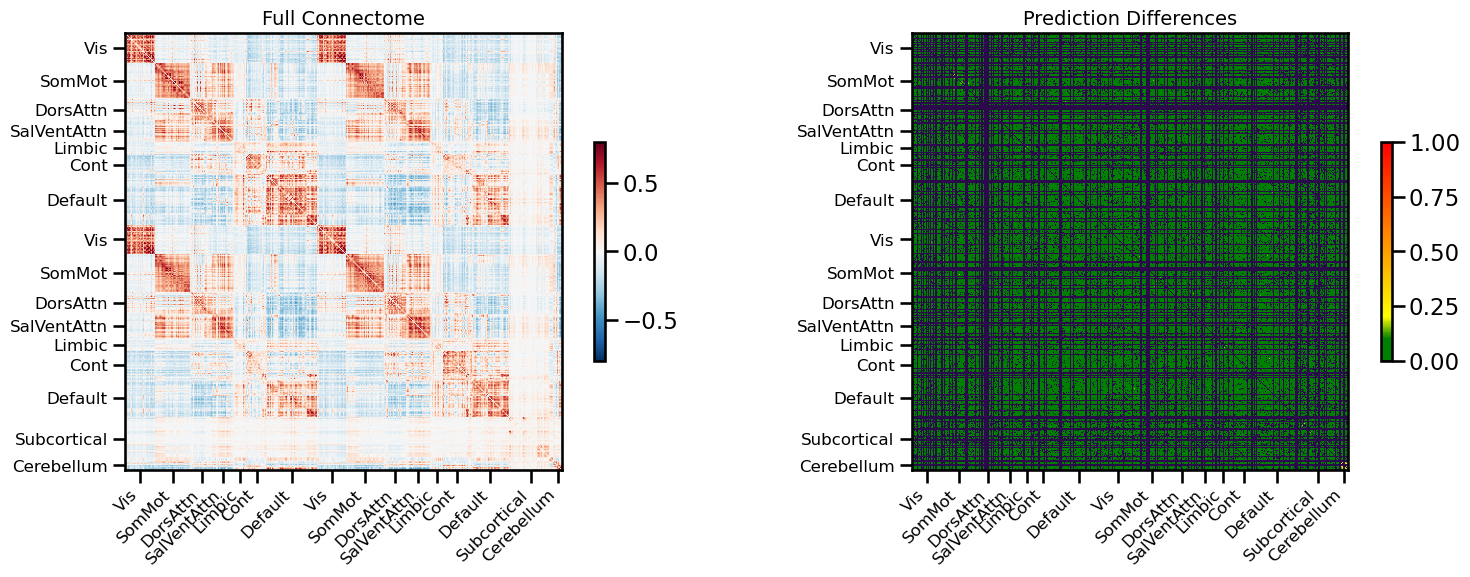

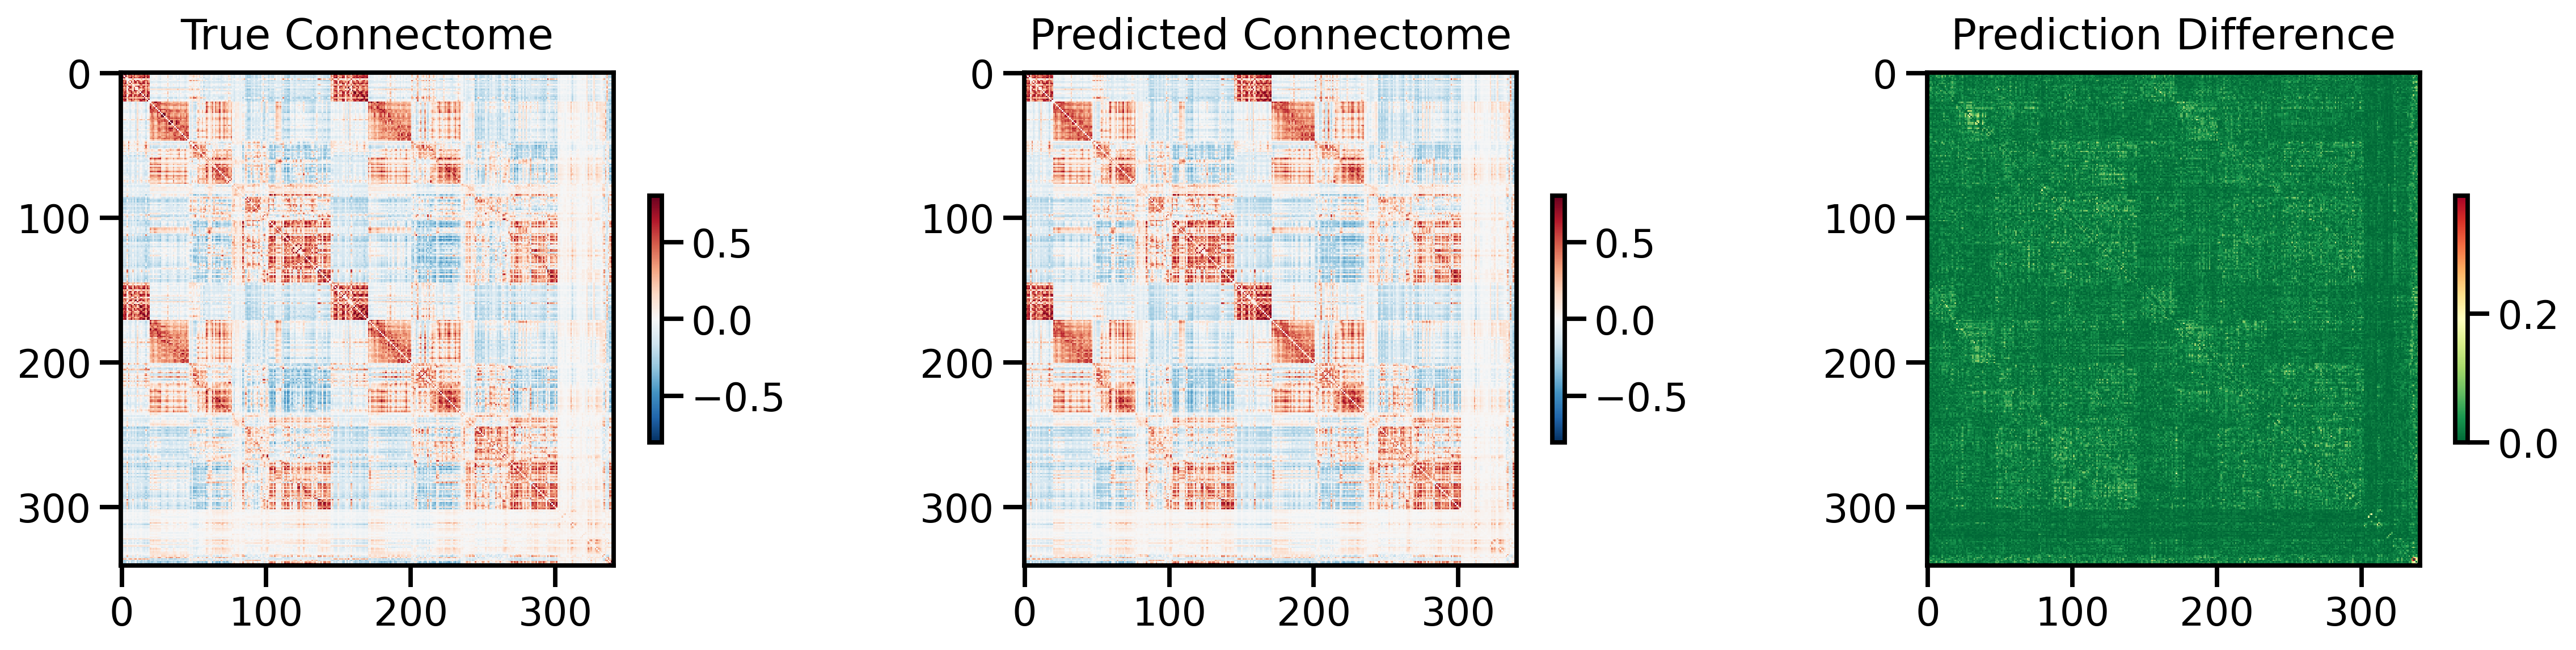

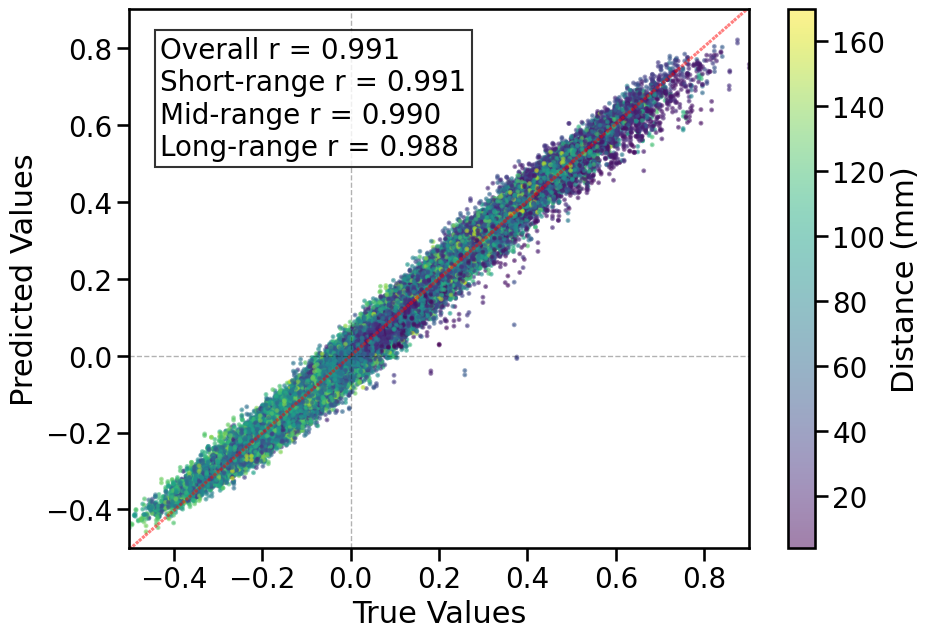

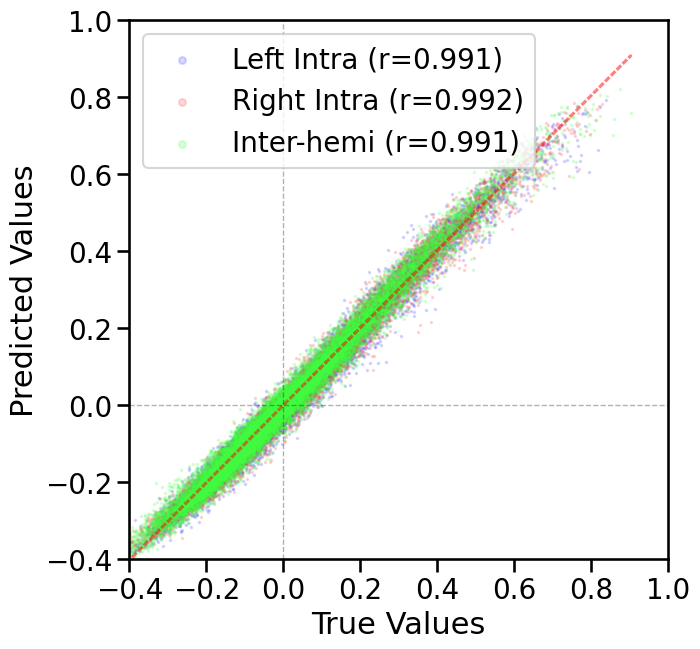

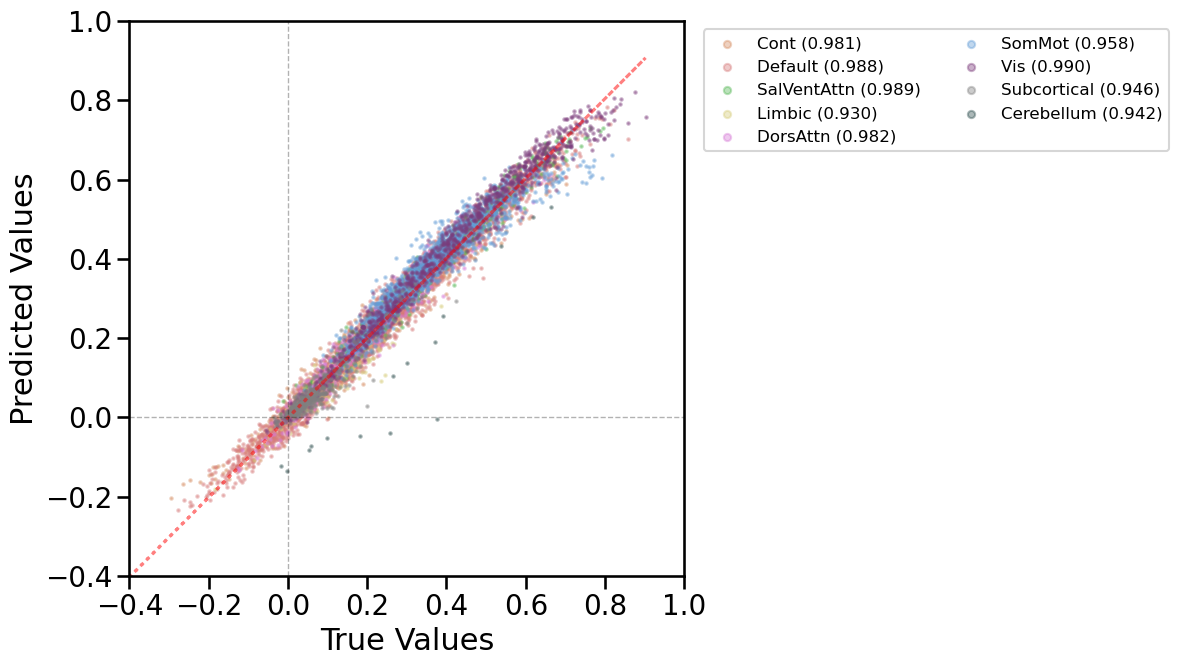

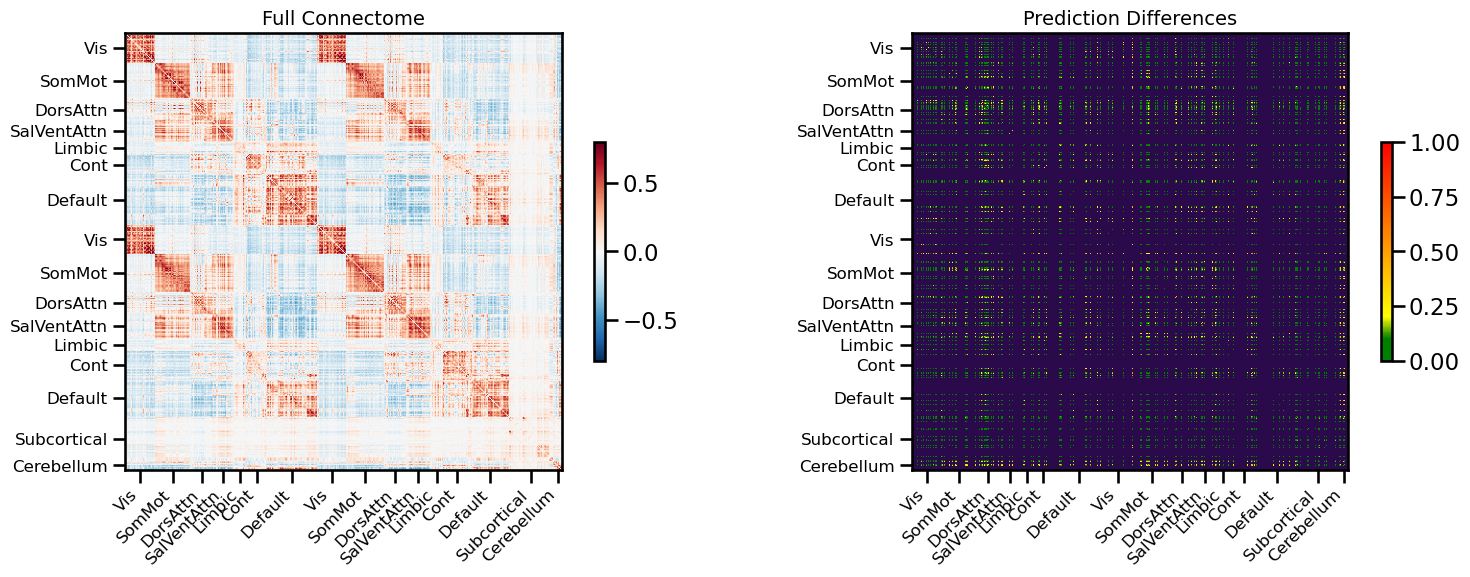

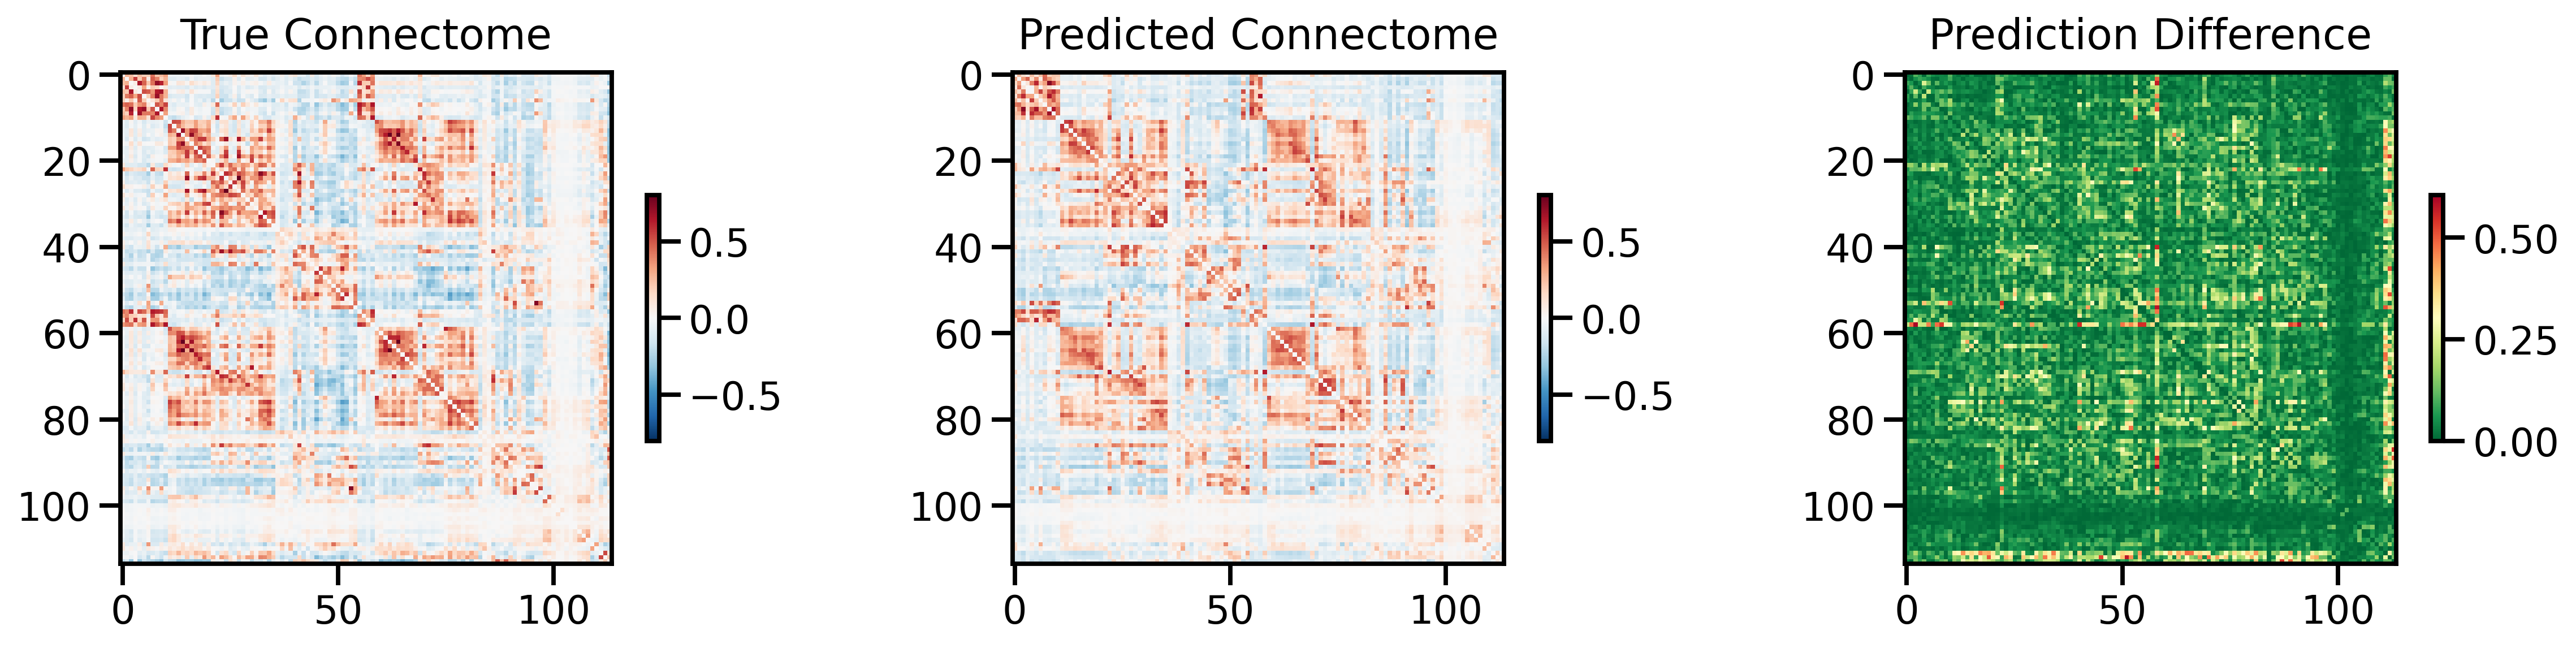

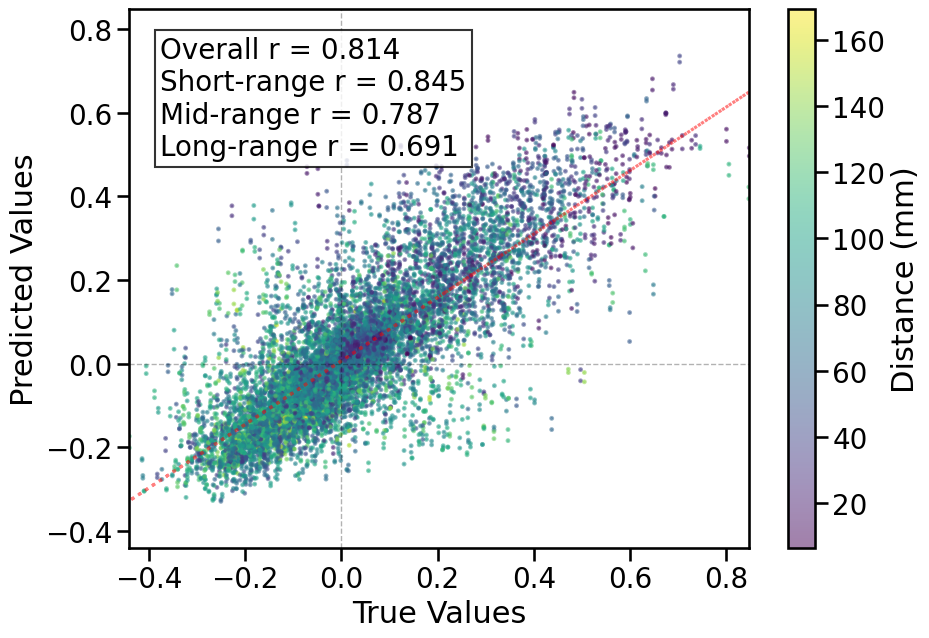

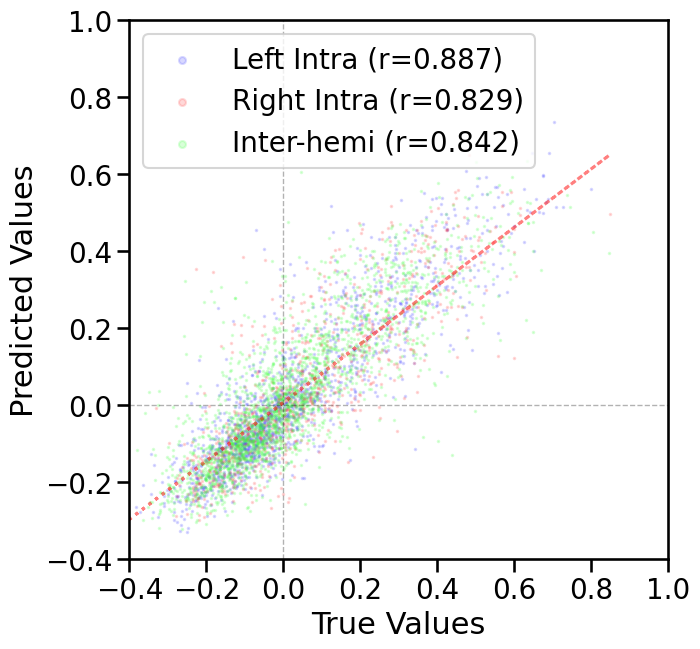

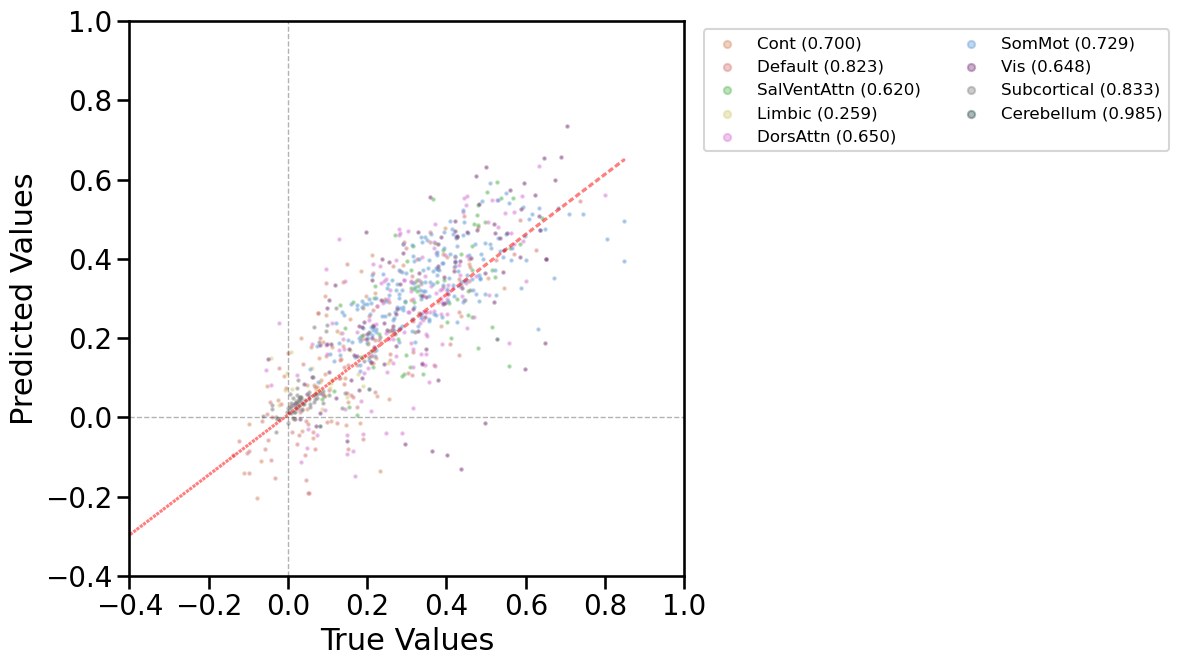


TRAIN METRICS: {'mse': 0.0006514263, 'mae': 0.019090509, 'r2': 0.9807702767062695, 'pearson_r': 0.9906521247241822, 'short_r': 0.9911744741631189, 'mid_r': 0.9896774693653908, 'long_r': 0.9879017517319649, 'left_hemi_r': 0.9910034461718435, 'right_hemi_r': 0.9919393476271384, 'inter_hemi_r': 0.9914337645132874, 'Cont_r': 0.9811636449160511, 'Default_r': 0.9880090857928282, 'SalVentAttn_r': 0.988590089169589, 'Limbic_r': 0.9302068512820646, 'DorsAttn_r': 0.9821250892553502, 'SomMot_r': 0.9577120759124479, 'Vis_r': 0.9896807001980679, 'Subcortical_r': 0.9460644185762024, 'Cerebellum_r': 0.9420308222746306, 'geodesic_distance': 12.032581052387439}
TEST METRICS: {'mse': 0.011486053, 'mae': 0.072191246, 'r2': 0.6491651037852243, 'pearson_r': 0.8142448363256694, 'short_r': 0.8454833371022286, 'mid_r': 0.7873037086929102, 'long_r': 0.6905895817976223, 'left_hemi_r': 0.8865206526056207, 'right_hemi_r': 0.8287666090482548, 'inter_hemi_r': 0.8417540041658302, 'Cont_r': 0.7001323431806253, 'Defa

51913

In [9]:
single_sim_run(
              feature_type=[{'transcriptome': None}, 
                           {'euclidean': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='dynamic_mlp',
              use_gpu=True, 
              null_model='none', 
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()